## First attempt at using personal images of my dogs and seeing if I can train to get the correct output

### First step - creating custom images
Taking these from my personal photo albums

        1. Upload images from my camera
        2. Images are too large (MB of data) so need to compress
        3. Using a concept from the internet
                a. able to read each image from specific directory
                b. reduce the size of the image
                c. side effect was a forced rotation so need to re-rotate 90d right
                d. save image with a specific file name for later labelling

In [1]:
# from PIL import Image
# import os
# import PIL
# import glob

# fixed_height = 420
# count = 14
# images = [file for file in os.listdir('./images/dogtest/thor') if file.endswith(('jpeg', 'png', 'jpg', 'JPG'))]
# for imageName in images:
#     image = Image.open('./images/dogtest/thor/' + imageName)
#     height_percent = (fixed_height / float(image.size[1]))
#     width_size = int((float(image.size[0]) * float(height_percent)))
#     image = image.resize((width_size, fixed_height), PIL.Image.NEAREST)
#     image = image.rotate(-90)
#     image.save(f'./images/dogtest/thor/thor{count}.jpg')
#     count += 1

### Second Step - Using pretrained models

Since there are not a lot images, using a pretrained model and see if I can make this work.

        1. 
        2. 
        3.
            a.
            b. 
            c. 
            d. 

In [2]:
import tensorflow as tf
import os
import pathlib
import numpy as np
cwd = os.getcwd()
data_route = cwd + '/images/dogs'

In [3]:
# allows the same weights and biases to be used eash run
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
batch_size = 32
img_height = 224
img_width = 224

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_route,
  validation_split=0.05,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_route,
  validation_split=0.05,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 93 files belonging to 2 classes.
Using 89 files for training.
Found 93 files belonging to 2 classes.
Using 4 files for validation.


In [6]:
class_names = train_ds.class_names
n_classes = len(class_names)
print(f'Class names: {class_names}\nNum of classes: {n_classes}')

Class names: ['atlas', 'thor']
Num of classes: 2


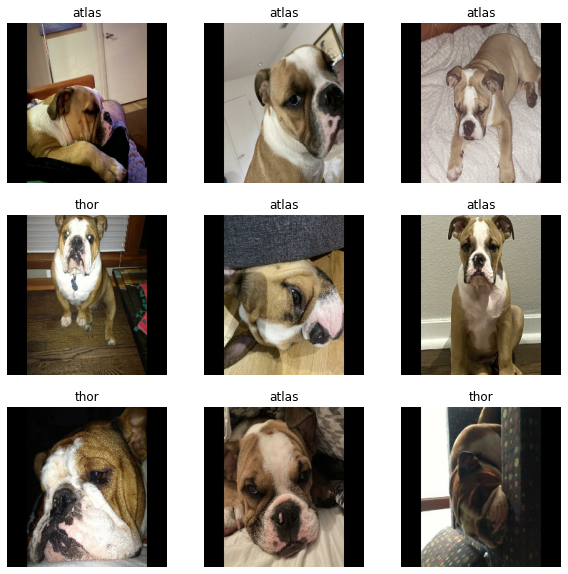

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
valid_ds.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

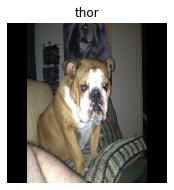

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in valid_ds.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(n_classes)
])


In [19]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#     loss="sparse_categorical_crossentropy",
  metrics=['accuracy'])

In [20]:
model.layers

In [21]:
# model.summary()

In [ ]:
model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=5
)


Epoch 1/5
2/3 [===================>..........] - ETA: 1s - loss: 0.6864 - accuracy: 0.5625

In [15]:
# evaluate the model
loss, acc = model.evaluate(valid_ds, verbose=1)
print(f'Test Accuracy: {acc:.3f}')

1/1 [==============================] - 0s 210ms/step - loss: 0.6931 - accuracy: 0.7500
Test Accuracy: 0.750


In [16]:
img = tf.keras.preprocessing.image.load_img(
    cwd + '/images/dogtest/thor/thor48.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions.ravel()

print('There is a(n) \n%.2f percent chance the image is Atlas \nand %.2f percent chance it is Thor.'
    %(score[0], score[1])
)



There is a(n) 
-0.00 percent chance the image is Atlas 
and -0.00 percent chance it is Thor.


In [17]:
score

array([-0.0048811 , -0.00389401], dtype=float32)